In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [2]:
import glob
import os
import torch
import tarfile
import imageio
import tarfile
import pandas as pd
import numpy as np
import torchvision
from PIL import Image
import seaborn as sns
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torchvision.transforms as T
from sklearn.metrics import f1_score
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib
%matplotlib inline
import torchvision.transforms as transforms
import torchvision.transforms as tt
from torchvision.datasets.utils import download_url
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import torch.nn as nn
import torch.nn.functional as F

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
valid_dir = '/content/drive/MyDrive/Ramsey_Fold_Classification_3'

print(os.listdir(valid_dir))
classes = os.listdir(valid_dir + "/VAL")
print(classes)

['~$msey fold classification.docx', '~WRL1123.tmp', 'TEST', 'TRAIN', 'VAL', 'tests', 'tests (1)']
['rounded', 'chevron']


In [5]:
test_dir = '/content/drive/MyDrive/Ramsey_Fold_Classification_3'

print(os.listdir(test_dir))
classes = os.listdir(test_dir + "/TEST")
print(classes)

['~$msey fold classification.docx', '~WRL1123.tmp', 'TEST', 'TRAIN', 'VAL', 'tests', 'tests (1)']
['chevron', 'rounded']


In [6]:
transform = transforms.Compose([transforms.Resize((64, 64)), 
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])

In [7]:
train_ds = ImageFolder("/content/drive/MyDrive/Ramsey_Fold_Classification_3/TRAIN" , transform=transform)
valid_ds = ImageFolder("/content/drive/MyDrive/Ramsey_Fold_Classification_3/VAL" , transform=transform)
test_ds = ImageFolder("/content/drive/MyDrive/Ramsey_Fold_Classification_3/TEST" , transform=transform)

In [8]:
len(train_ds), len(valid_ds), len(test_ds)

(1920, 480, 44)

In [9]:
print(train_ds.classes)

['chevron', 'rounded']


In [10]:
batch_size = 128

In [11]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)

In [12]:
img, label = train_ds[0]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.8745, 0.9961, 1.0000],
         [0.9922, 0.9961, 0.9922,  ..., 0.6588, 0.9647, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9608, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.6627, 0.9882, 1.0000],
         [0.9922, 0.9961, 0.9922,  ..., 0.5490, 0.9294, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [13]:
img, label = valid_ds[0]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9843, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9843, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 0.9961,  ..., 0.7882, 0.9961, 1.0000],
         [0.9961, 0.9922, 0.9333,  ..., 0.4980, 0.9255, 0.9961],
         [1.0000, 1.0000, 0.9686,  ..., 0.8431, 0.9647, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9843, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9843, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.8471, 1.0000, 1.0000],
         [0.9961, 0.9922, 0.9529,  ..., 0.6431, 0.9451, 0.9961],
         [1.0000, 1.0000, 0.9765,  ..., 0.8863, 0.9725, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9843, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9843, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 1.0000, 1.

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [15]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  rounded (1)


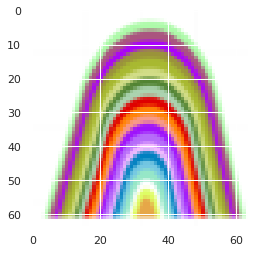

In [16]:
show_example(*train_ds[1000])

Label:  chevron (0)


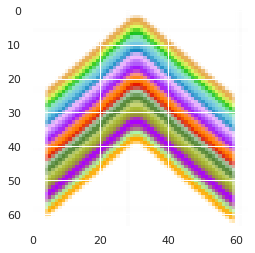

In [17]:
show_example(*train_ds[10])

In [18]:
print(train_ds.classes)
#print(test_ds.classes)
print(valid_ds.classes)

['chevron', 'rounded']
['chevron', 'rounded']


In [19]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:4], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

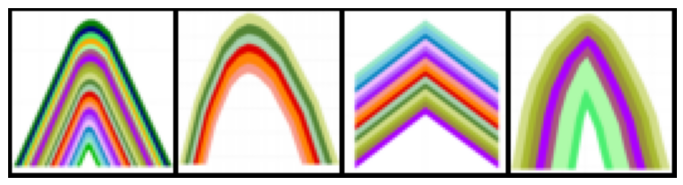

In [20]:
show_batch(train_dl)

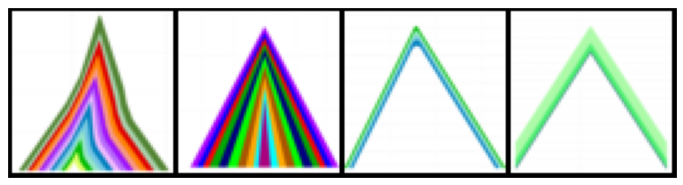

In [21]:
show_batch(valid_dl)

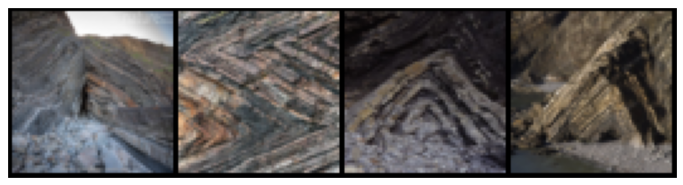

In [22]:
show_batch(test_dl)

In [23]:
import torch.nn as nn
import torch.nn.functional as F

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}],{} train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, "last_lr: {:.5f},".format(result['lrs'][-1]) if 'lrs' in result else '', 
            result['train_loss'], result['val_loss'], result['val_acc']))

In [24]:
from torchvision import models

class foldsModel(ImageClassificationBase):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=pretrained)
        # Replace last layer
        self.network.fc = nn.Linear(self.network.fc.in_features, num_classes)

    def forward(self, xb):
        return self.network(xb)

In [25]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [26]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [27]:
device = get_default_device()
device

device(type='cuda')

In [28]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [29]:
model = foldsModel(len(train_ds.classes), pretrained=False)
to_device(model, device);

In [30]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.53125, 'val_loss': 3.9588463306427}]

In [31]:
epochs = 24
max_lr = 0.007
grad_clip = 0.01
weight_decay = 1e-6
opt_func = torch.optim.Adam

In [32]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)


Epoch [0],last_lr: 0.00056, train_loss: 0.4284, val_loss: 0.9917, val_acc: 0.4688



Epoch [1],last_lr: 0.00143, train_loss: 0.1641, val_loss: 1.6211, val_acc: 0.6361



Epoch [2],last_lr: 0.00271, train_loss: 0.1451, val_loss: 2.7442, val_acc: 0.6562



Epoch [3],last_lr: 0.00418, train_loss: 0.1280, val_loss: 7.1942, val_acc: 0.5449



Epoch [4],last_lr: 0.00554, train_loss: 0.1403, val_loss: 0.8851, val_acc: 0.7109



Epoch [5],last_lr: 0.00654, train_loss: 0.1659, val_loss: 0.8733, val_acc: 0.8385



Epoch [6],last_lr: 0.00699, train_loss: 0.1924, val_loss: 0.9625, val_acc: 0.7806



Epoch [7],last_lr: 0.00696, train_loss: 0.1057, val_loss: 0.3214, val_acc: 0.8626



Epoch [8],last_lr: 0.00680, train_loss: 0.0761, val_loss: 0.0792, val_acc: 0.9707



Epoch [9],last_lr: 0.00653, train_loss: 0.0580, val_loss: 0.1542, val_acc: 0.9635



Epoch [10],last_lr: 0.00615, train_loss: 0.0458, val_loss: 0.1269, val_acc: 0.9655



Epoch [11],last_lr: 0.00568, train_loss: 0.0405, val_loss: 0.0721, val_acc: 0.9805



Epoch [12],last_lr: 0.00514, train_loss: 0.0211, val_loss: 0.0974, val_acc: 0.9740



Epoch [13],last_lr: 0.00453, train_loss: 0.0206, val_loss: 0.1312, val_acc: 0.9661



Epoch [14],last_lr: 0.00389, train_loss: 0.0195, val_loss: 0.1132, val_acc: 0.9701



Epoch [15],last_lr: 0.00324, train_loss: 0.0125, val_loss: 0.0843, val_acc: 0.9805



Epoch [16],last_lr: 0.00259, train_loss: 0.0128, val_loss: 0.0993, val_acc: 0.9701



Epoch [17],last_lr: 0.00198, train_loss: 0.0078, val_loss: 0.1047, val_acc: 0.9798



Epoch [18],last_lr: 0.00142, train_loss: 0.0079, val_loss: 0.1259, val_acc: 0.9805



Epoch [19],last_lr: 0.00093, train_loss: 0.0040, val_loss: 0.1216, val_acc: 0.9805



Epoch [20],last_lr: 0.00054, train_loss: 0.0026, val_loss: 0.1230, val_acc: 0.9785



Epoch [21],last_lr: 0.00024, train_loss: 0.0023, val_loss: 0.1236, val_acc: 0.9785



Epoch [22],last_lr: 0.00006, train_loss: 0.0022, val_loss: 0.1283, val_acc: 0.9785



Epoch [23],last_lr: 0.00000, train_loss: 0.0018, val_loss: 0.1283, val_acc: 0.9785
CPU times: user 25 s, sys: 10.7 s, total: 35.7 s
Wall time: 5min 41s


In [33]:
model

foldsModel(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [34]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

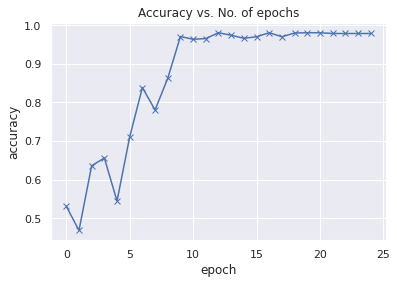

In [35]:
plot_accuracies(history)

In [36]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

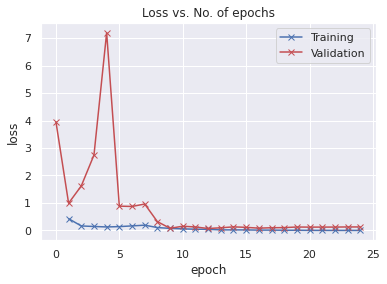

In [37]:
plot_losses(history)

In [38]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

In [39]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label: chevron , Predicted: chevron


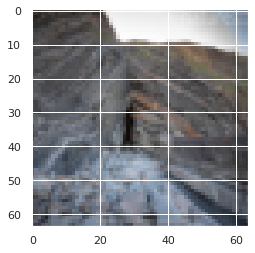

In [40]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


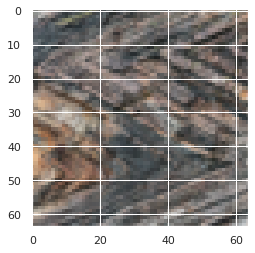

In [41]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


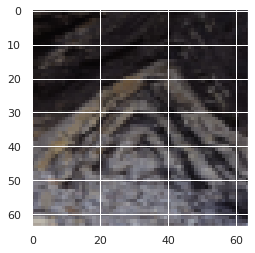

In [42]:
img, label = test_ds[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


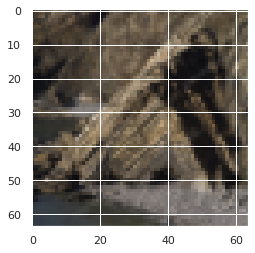

In [43]:
img, label = test_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


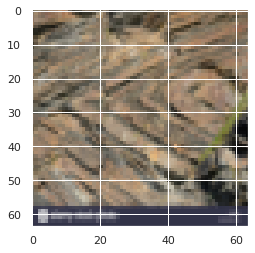

In [44]:
img, label = test_ds[4]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


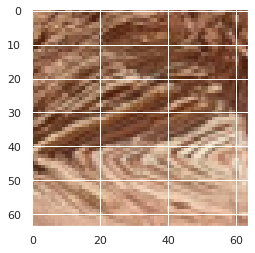

In [45]:
img, label = test_ds[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


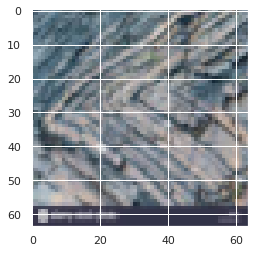

In [46]:
img, label = test_ds[6]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: chevron


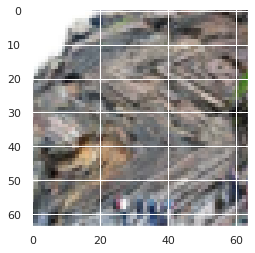

In [47]:
img, label = test_ds[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


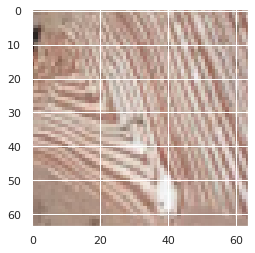

In [48]:
img, label = test_ds[8]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


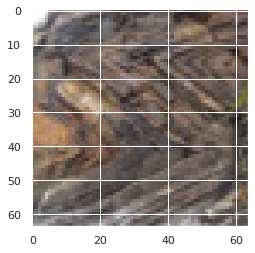

In [49]:
img, label = test_ds[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


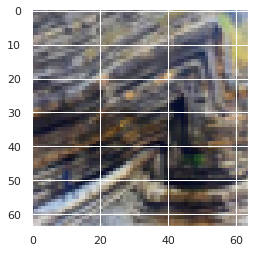

In [50]:
img, label = test_ds[10]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


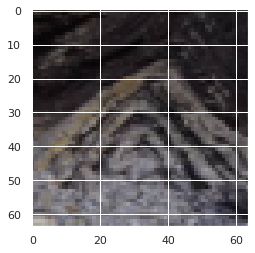

In [51]:
img, label = test_ds[11]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron , Predicted: rounded


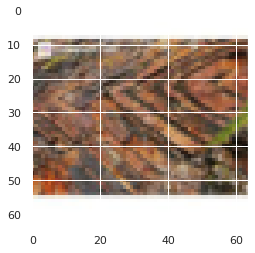

In [52]:
img, label = test_ds[12]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

In [53]:
test_loader = DeviceDataLoader(DataLoader(test_ds, batch_size), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.40909090638160706, 'val_loss': 2.7953402996063232}